Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 1.9 MB/s 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  18581      0 --:--:-- --:--:-- --:--:-- 18581
i: 0
width:   299
height:  168
channel: 3


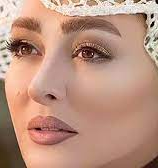

i: 1
width:   275
height:  183
channel: 3


i: 2
width:   300
height:  168
channel: 3


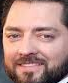

i: 3
width:   225
height:  225
channel: 3


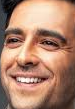

i: 4
width:   187
height:  269
channel: 3


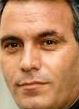

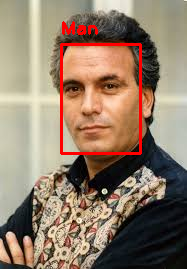

In [ ]:
#!pip install tensorflow==2.9.1
import tensorflow as tf
!pip install mtcnn
#from mtcnn.mtcnn import MTCNN
import cv2
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
from google.colab.patches import cv2_imshow
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from joblib import load

detector= MTCNN()
clf=load("/content/drive/MyDrive/gender_classifier.z")
#Define Function:
def face_spot(img):
  try:
    rgb_img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    out= detector.detect_faces(rgb_img)[0]
    x, y, w, h=out["box"]
    #print("x: {}".format(x))
    return img [y:y+h, x: x+w], x, y, w, h

  except:
    pass
#Preprocessing test images
for i, item in enumerate(glob.glob("/content/drive/MyDrive/Colab Notebooks/TestGenderDetect/*")):
  print("i: {}".format(i))
  img= cv2.imread(item)
  #cv2_imshow(img)
  h, w, c = img.shape
  print('width:  ', w)
  print('height: ', h)
  print('channel:', c)
  face, x, y, w, h= face_spot (img)
  cv2_imshow(face)
  if face is None:
    continue
  face= cv2.resize (face, (32,32))
  face= face.flatten()
  face= face/255
  #Estefade az model sakhte shode
  out= clf.predict(np.array([face]))[0]
  if out=="male":
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255),2)
    cv2.putText(img, "Man", (x, y-10), cv2.FONT_HERSHEY_PLAIN, 1.2, (0,0,255), 2)
  elif out=="female":
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255),2)
    cv2.putText(img, "Woman", (x, y-10), cv2.FONT_HERSHEY_PLAIN, 1.2, (255,0,0), 2)

cv2_imshow(img)